In [1]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random

from sklearn import cross_validation
from sklearn import metrics

from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook(bokeh.resources.INLINE)

from sqlalchemy import create_engine

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Loading BokehJS ...

In [2]:
irisDf = pd.read_csv('./data/Iris.csv')
# Sample Timeseries  picked from here https://www.backblaze.com/b2/hard-drive-test-data.html
hdd2013Df = pd.read_csv('./data/hdd_2013-11-26.csv')

In [3]:
# Create classes for showing off correlation_analyze's heatmapping ability
def createClasses(x):
    rdm = random.random()
    if rdm < 0.3:
        return 'A'
    elif rdm > 0.3 and rdm < 0.6:
        return 'B' 
    else:
        return 'C'
irisDf['Class'] = irisDf['Species'].apply(createClasses)

In [4]:
irisDf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
irisDf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,C
1,2,4.9,3.0,1.4,0.2,Iris-setosa,A
2,3,4.7,3.2,1.3,0.2,Iris-setosa,A
3,4,4.6,3.1,1.5,0.2,Iris-setosa,C
4,5,5.0,3.6,1.4,0.2,Iris-setosa,C


In [6]:
irisDf.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [7]:
irisDf.select_dtypes(include=[np.number]).columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [8]:
analyze.correlation_analyze(irisDf, exclude_columns='Id', 
                                categories=['Species', 'Class'], 
                                measures=['count', 'SepalLengthCm','SepalWidthCm',
                                           'PetalLengthCm', 'PetalWidthCm'])

# Correlation btw Numerical Columns


# Correlation btw Columns Species & Class by count


# Pandas correlation coefficients matrix
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  
# Pandas co-variance coefficients matrix
                        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1887.500000      25.782886     -7.492282      67.667785   
SepalLengthCm    25.782886       0.685694     -0.039268       1.273682   
SepalWidthCm     -7.492282      -0.039268      0.188004      -0.321713   
PetalLengthCm  

In [9]:
analyze.dist_analyze(irisDf)

> /home/anand/playspace/data-science-utils/datascienceutils/analyze.py(20)dist_analyze()
-> for column in numericalColumns:
(Pdb) n
> /home/anand/playspace/data-science-utils/datascienceutils/analyze.py(21)dist_analyze()
-> plots.append(plotter.sb_violinplot(df[column], inner='point'))
(Pdb) n


/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


> /home/anand/playspace/data-science-utils/datascienceutils/analyze.py(20)dist_analyze()
-> for column in numericalColumns:
(Pdb) n
> /home/anand/playspace/data-science-utils/datascienceutils/analyze.py(21)dist_analyze()
-> plots.append(plotter.sb_violinplot(df[column], inner='point'))
(Pdb) n
> /home/anand/playspace/data-science-utils/datascienceutils/analyze.py(20)dist_analyze()
-> for column in numericalColumns:
(Pdb) n
> /home/anand/playspace/data-science-utils/datascienceutils/analyze.py(21)dist_analyze()
-> plots.append(plotter.sb_violinplot(df[column], inner='point'))
(Pdb) n
> /home/anand/playspace/data-science-utils/datascienceutils/analyze.py(20)dist_analyze()
-> for column in numericalColumns:
(Pdb) c


In [10]:
analyze.dist_analyze(irisDf, 'SepalLengthCm')

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:262: UserWarning: Path marker shapes currently not handled, defaulting to Circle
  warnings.warn("Path marker shapes currently not handled, defaulting to Circle")
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/matplotlib/artist.py:224: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)
/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/bokeh/core/compat/bokeh_renderer.py:295: UserWarning: Path marker sizes support is limited and may not display as expected
  warnings.warn("Path marker sizes support is limited and may not display as expected")


In [11]:
analyze.regression_analyze(irisDf, 'SepalLengthCm', 'SepalWidthCm')

/home/anand/playspace/data-science-utils/datascienceutils/predictiveModels.py:114: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  source = dataframe[column].reshape((len(target), 1))


Regression Score
0.0119616328348


In [12]:
target = irisDf.Species
irisDf.drop(['Species', 'Class'], 1, inplace=True)


In [13]:
irisDf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


For clusters = 2 The average silhouette_score is : 0.620465604655


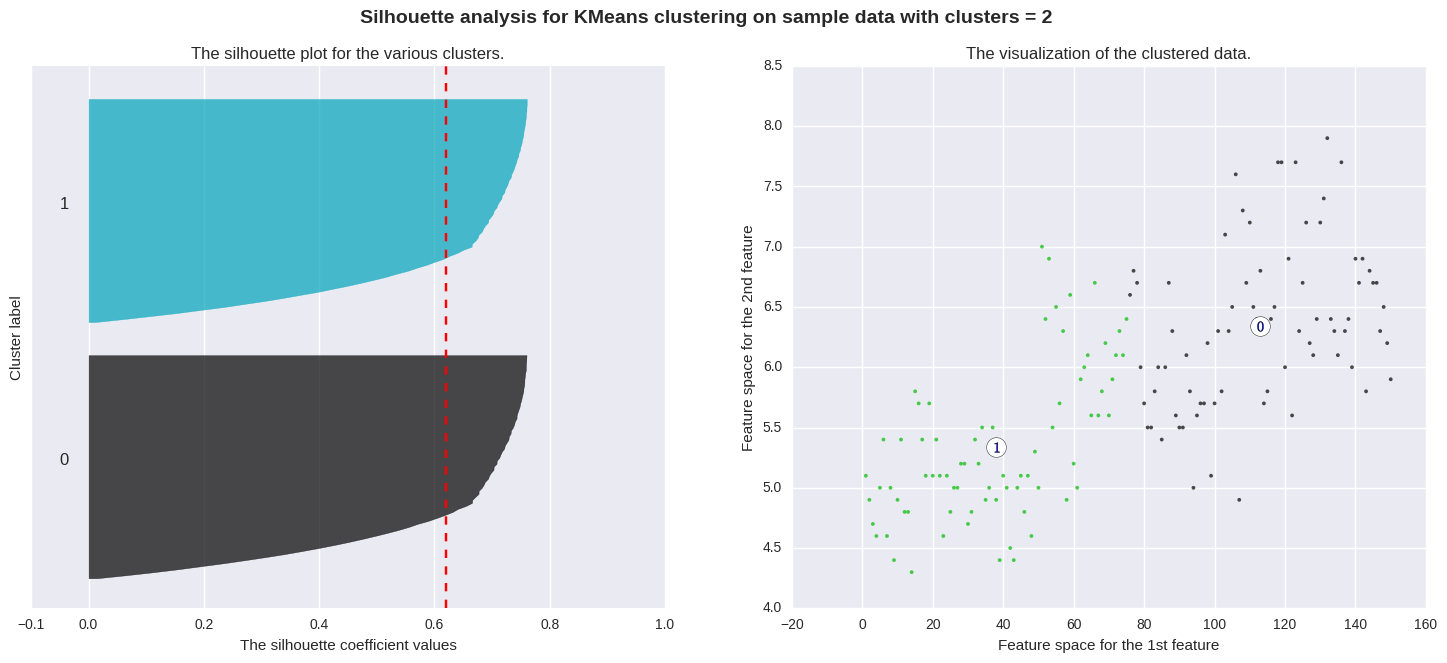

For clusters = 4 The average silhouette_score is : 0.556569210379


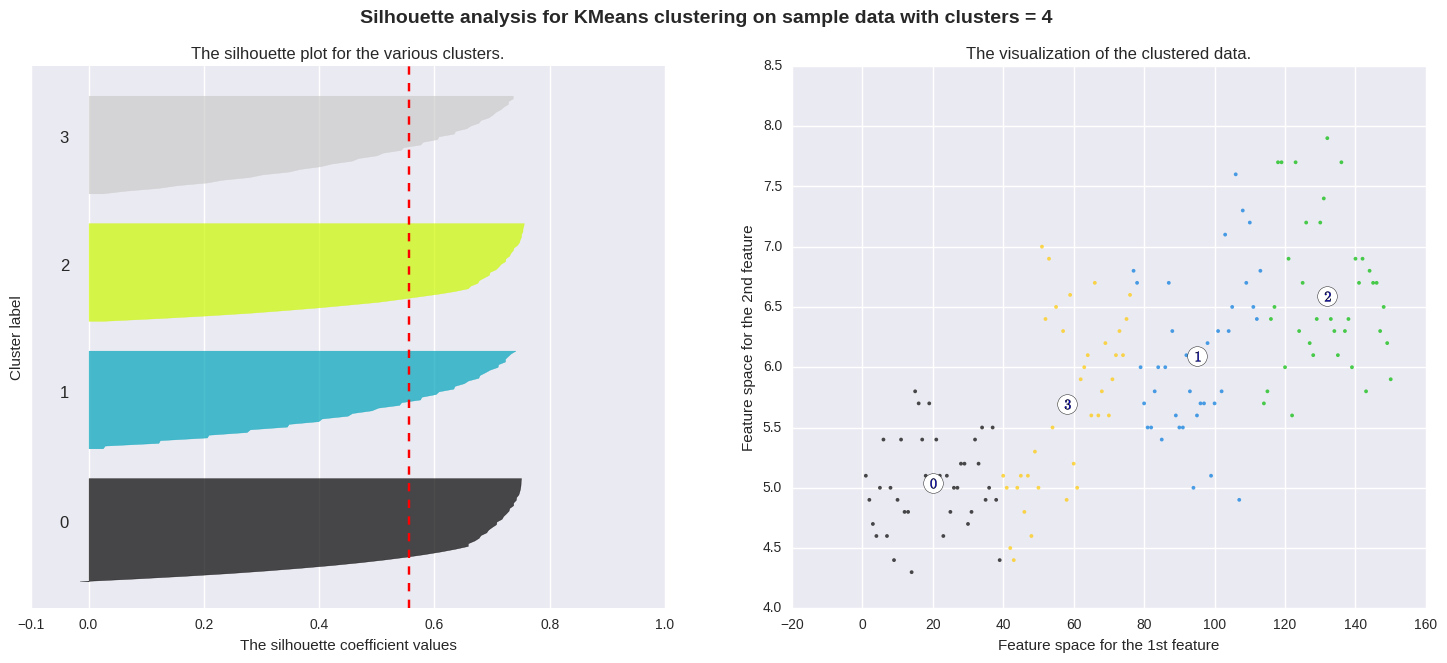

For clusters = 6 The average silhouette_score is : 0.532536501633


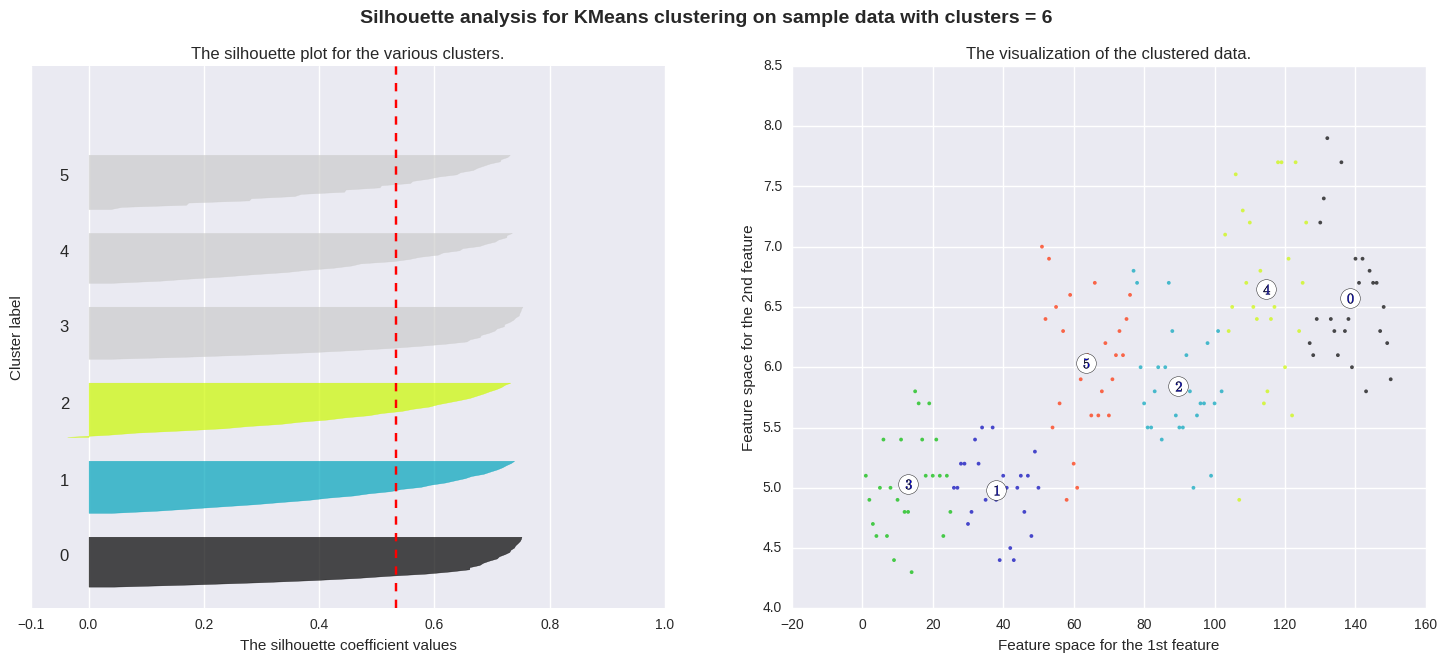

In [14]:
analyze.silhouette_analyze(irisDf, cluster_type='KMeans')

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

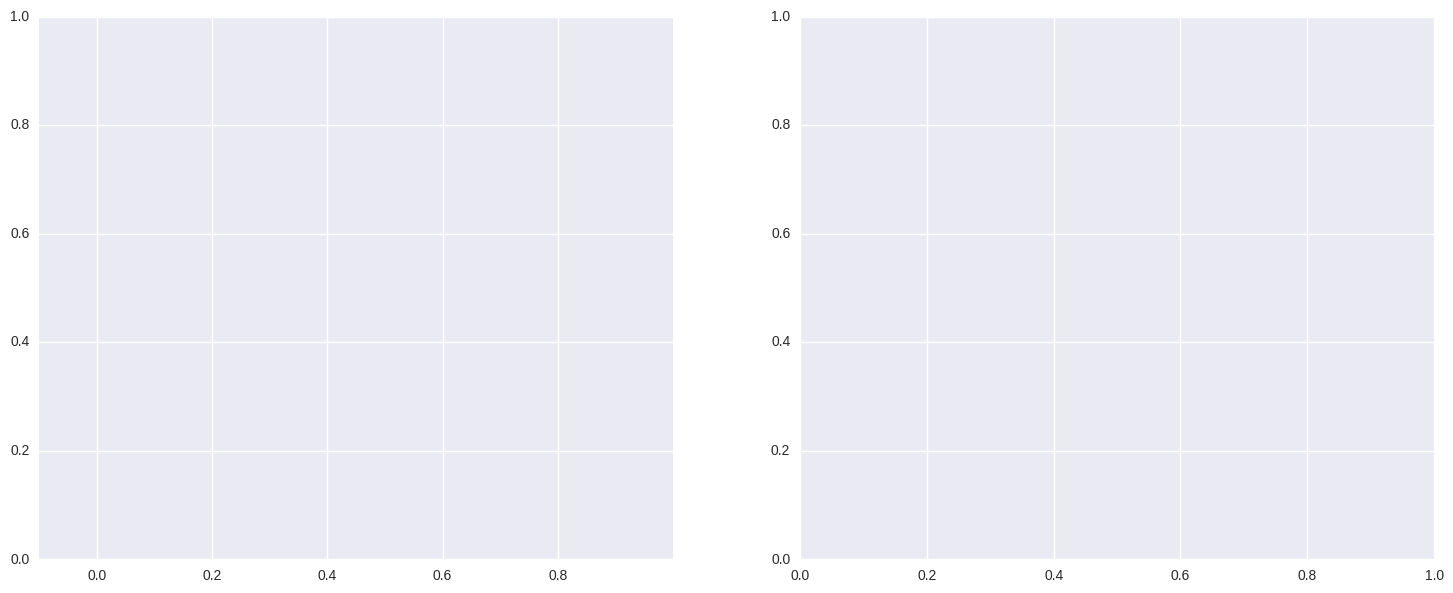

In [15]:
analyze.silhouette_analyze(irisDf, cluster_type='dbscan')

In [ ]:

analyze.silhouette_analyze(irisDf, cluster_type='spectral')

In [ ]:

analyze.silhouette_analyze(irisDf, cluster_type='birch')

In [ ]:
#analyze.som_analyze(df, (10,10), algo_type='som')

In [ ]:
hdd2013Df.fillna(value=0, inplace=True)
hdd2013Df.describe()

In [ ]:
hdd2013Df.head()

In [ ]:
hdd2013Df['date'] = hdd2013Df['date'].astype('datetime64[ns]')

In [ ]:
hdd2013Df['date'] = [each + datetime.timedelta(0, i*45) for i, each in enumerate(hdd2013Df.date)]

In [ ]:
analyze.time_series_analysis(hdd2013Df, timeCol='date', valueCol='smart_1_raw', seasonal={'freq': '30s'})